In [1]:
#intuition
# Step 1 :- Choose the number K of clusters
# Step 2 :- Slect at random k points, the centroids(not necessarily from your dataset)
# Step 3 :- Assign each data point to the closest centroid that forms  K clusters
# Step 4 :- compute and place the new centroid of each cluster
# Step 5 :- Readdign each data point to the new closest centroid, if any reassignment took place, go 
# to step 4, otherwise go to FIN.


In [2]:
#how to correctly selects random centroids at the start ?
# K-Means++ happens in the background to select the first random centroids

In [4]:
#Choosing the right number of clusters ?
# WCSS = Sumi=0 to all points in cluster 1(distance(Pi,C1)^2 + Sumi=0 to all points in cluster 2(distance(Pi,C2)^2 + Sumi=0 to all points in cluster 3(distance(Pi,C3)^2 + ....
# the lesser the WCSS the better
# Using the elbow  method to find the optimal number

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
 data = pd.read_csv('mall.csv')

In [9]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [11]:
# we are trying to find some patterns
# we will create a dependent variable which will take finite number of values and each value will be class of dependent variable
#Hence our target is to create a dependent variable


In [13]:
X = data.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

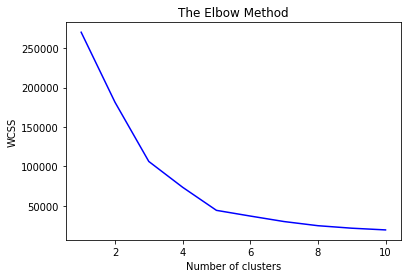

In [18]:
#Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++' , random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) #it calculates the wcss 

plt.plot(range(1,11),wcss,color='blue')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
#Hence the optimal number of clusters is 5

In [20]:
# training the K-means model on the dataset
# Now we need to identify the 5 clusters
kmeans = KMeans(n_clusters=5, init = 'k-means++' , random_state = 42)
y_pred = kmeans.fit_predict(X)
    

In [21]:
# hence we have segregated customers into clusters
print(y_pred)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


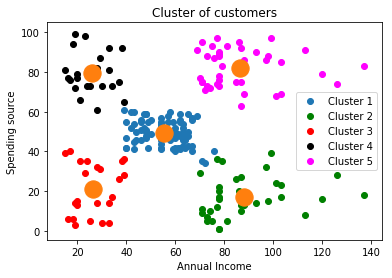

In [35]:
#Visualizing the clusters in 2d
plt.scatter(X[y_pred == 0,0],X[y_pred == 0,1],label= 'Cluster 1') #cluster of index 0
plt.scatter(X[y_pred == 1,0],X[y_pred == 1,1],color='green',label= 'Cluster 2') #cluster of index 1
plt.scatter(X[y_pred == 2,0],X[y_pred == 2,1],color='red',label= 'Cluster 3') #cluster of index 2
plt.scatter(X[y_pred == 3,0],X[y_pred == 3,1],color='black',label= 'Cluster 4') #cluster of index 3
plt.scatter(X[y_pred == 4,0],X[y_pred == 4,1],color='magenta',label= 'Cluster 5') #cluster of index 4
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300)
plt.title('Cluster of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending source')
plt.legend()
plt.show()